# **Klasifikasi Penjualan Game Populer dan Tidak Populer Berdasarkan Penjualan Global Menggunakan Random Forest**

NAMA: LINNDA PRAWIDYA NUR'AINI

NIM: 22.11.4853

SOURCE: https://www.kaggle.com/datasets/thedevastator/video-game-sales-and-ratings

LINK G-COLABS: https://colab.research.google.com/drive/1o_CeE8RsG9WHIh6AUSD6GNUNZiupWlst?usp=sharing

**IMPORT LIBRARY**

In [114]:
# Import library
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [116]:
# 1. Load dataset
df = pd.read_csv('/content/drive/MyDrive/smt5/UAS/Video_Games.csv')

**EDA**

In [117]:
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16928 entries, 0 to 16927
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16928 non-null  int64  
 1   Name             16926 non-null  object 
 2   Platform         16928 non-null  object 
 3   Year_of_Release  16655 non-null  float64
 4   Genre            16926 non-null  object 
 5   Publisher        16873 non-null  object 
 6   NA_Sales         16928 non-null  float64
 7   EU_Sales         16928 non-null  float64
 8   JP_Sales         16928 non-null  float64
 9   Other_Sales      16928 non-null  float64
 10  Global_Sales     16928 non-null  float64
 11  Critic_Score     8260 non-null   float64
 12  Critic_Count     8260 non-null   float64
 13  User_Score       10159 non-null  object 
 14  User_Count       7718 non-null   float64
 15  Developer        10240 non-null  object 
 16  Rating           10092 non-null  object 
dtypes: float64(9

In [119]:
#menampilkan data duplikat
df.duplicated().sum()

0

In [120]:
#menampilkan data yang hilang
df.isna().sum()

,0
index,0
Name,2
Platform,0
Year_of_Release,273
Genre,2
Publisher,55
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [121]:
#Mengisi data kosong
df['Name'].fillna('Unknown', inplace=True)
df['Year_of_Release'].fillna('Unknown Year', inplace=True)
df['Genre'].fillna('Unknown Genre', inplace=True)
df['Publisher'].fillna('Unkown Year', inplace=True)
df['Critic_Score'].fillna('No Description Available', inplace=True)
df['Critic_Count'].fillna('No Description Available', inplace=True)
df['User_Score'].fillna('No Description Available', inplace=True)
df['User_Count'].fillna('No Description Available', inplace=True)
df['Developer'].fillna('No Description Available', inplace=True)
df['Rating'].fillna('No Description Available', inplace=True)

<ipython-input-121-75836a5c3f2b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Name'].fillna('Unknown', inplace=True)
<ipython-input-121-75836a5c3f2b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'd

In [122]:
#menampilkan data yang hilang
df.isna().sum()

,0
index,0
Name,0
Platform,0
Year_of_Release,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [123]:
# Step 2: Feature Engineering
# Menambahkan kolom baru untuk menentukan apakah game populer
# Misalnya: Game dengan volume penjualan di Global_sales > median akan dianggap populer
df['peak_sales'] = (df['Global_Sales'] > df['Global_Sales'].median()).astype(int)
df.head()

,index,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating,peak_sales
0,0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E,1
1,1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,No Description Available,No Description Available,No Description Available,No Description Available,No Description Available,No Description Available,1
2,2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E,1
3,3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E,1
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,No Description Available,No Description Available,No Description Available,No Description Available,No Description Available,No Description Available,1


In [124]:
# Membuat instance LabelEncoder
label_encoder = LabelEncoder()

# Melakukan encoding
df['Name_Encoded'] = label_encoder.fit_transform(df['Name'])
df['Platform_Encoded'] = label_encoder.fit_transform(df['Platform'])
df['Genre_Encoded'] = label_encoder.fit_transform(df['Genre'])

In [125]:
df.drop(['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating', 'Name', 'Platform', 'Genre', 'Publisher'], axis=1, inplace=True)
df.head()

,index,Global_Sales,peak_sales,Name_Encoded,Platform_Encoded,Genre_Encoded
0,0,82.53,1,11076,26,10
1,1,40.24,1,9389,11,4
2,2,35.52,1,5613,26,6
3,3,32.77,1,11078,26,10
4,4,31.37,1,7392,5,7


In [126]:
df.corr()

,index,Global_Sales,peak_sales,Name_Encoded,Platform_Encoded,Genre_Encoded
index,1.000000,-0.409513,-0.827190,-0.014707,-0.076993,-0.058135
Global_Sales,-0.409513,1.000000,0.304908,0.010446,0.027048,0.024161
peak_sales,-0.827190,0.304908,1.000000,0.017371,0.074667,0.050089
Name_Encoded,-0.014707,0.010446,0.017371,1.000000,0.016053,-0.001684
Platform_Encoded,-0.076993,0.027048,0.074667,0.016053,1.000000,0.025759
Genre_Encoded,-0.058135,0.024161,0.050089,-0.001684,0.025759,1.000000


In [127]:
# Inisialisasi MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi dataframe (semua kolom numerik)
normalized_data = scaler.fit_transform(df)

# Konversi kembali ke DataFrame untuk kemudahan interpretasi
df_normalized = pd.DataFrame(normalized_data, columns=df.columns)

print("Data sebelum normalisasi:")
df.head()
print("\nData setelah normalisasi:")
df_normalized.head()

Data sebelum normalisasi:

Data setelah normalisasi:


,index,Global_Sales,peak_sales,Name_Encoded,Platform_Encoded,Genre_Encoded
0,0.000000,1.000000,1.0,0.957966,0.866667,0.833333
1,0.000059,0.487518,1.0,0.812057,0.366667,0.333333
2,0.000118,0.430320,1.0,0.485470,0.866667,0.500000
3,0.000177,0.396995,1.0,0.958139,0.866667,0.833333
4,0.000236,0.380029,1.0,0.639336,0.166667,0.583333


PROSES KLASIFIKASI

In [128]:
# 1. Pisahkan X (fitur) dan y (label)
X = df.drop(columns=["peak_sales"])  # Semua kolom kecuali peak_sales
y = df["peak_sales"]  # Kolom label

In [129]:
# 2. Split data menjadi training dan testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Menampilkan jumlah data pada training dan testing set
print("Jumlah data di training set:", len(X_train))
print("Jumlah data di testing set:", len(X_test))

Jumlah data di training set: 11849
Jumlah data di testing set: 5079


In [130]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Balancing data dengan SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Jumlah data sebelum balancing:", len(y_train), "=", len(y_train.value_counts()))
print("Jumlah data setelah balancing:", len(y_train_balanced), "=", len(np.unique(y_train_balanced)))

Jumlah data sebelum balancing: 11849 = 2
Jumlah data setelah balancing: 12058 = 2


<ipython-input-131-4142cfcd11aa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set1")
<ipython-input-131-4142cfcd11aa>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_balanced, palette="Set1")


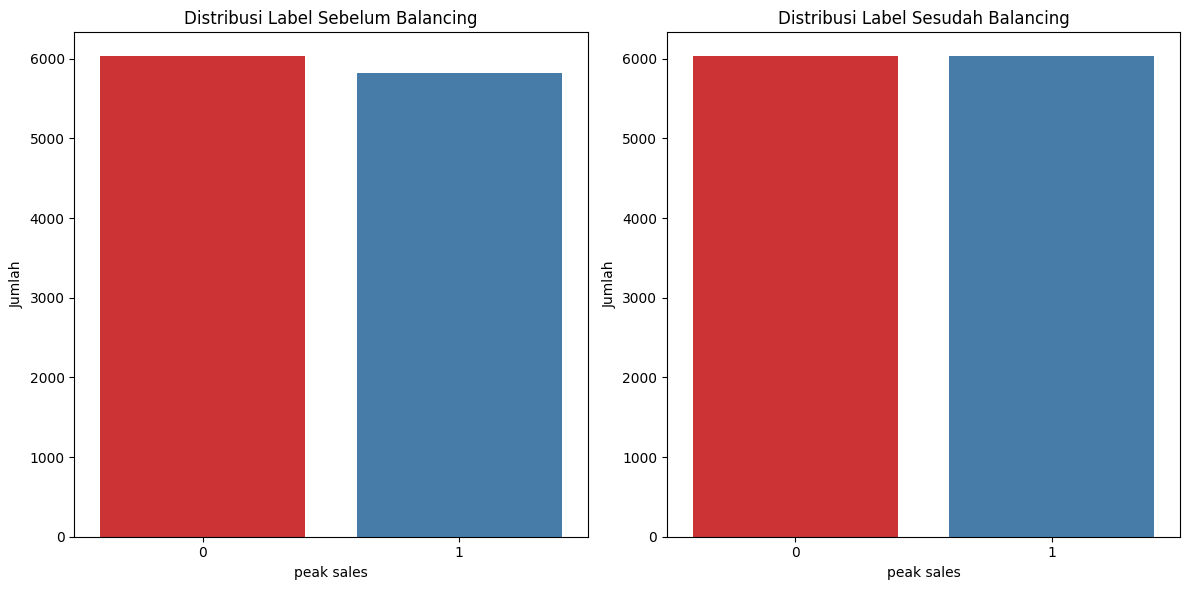

In [131]:
# Plot distribusi label sebelum dan sesudah balancing
plt.figure(figsize=(12, 6))

# Sebelum balancing
plt.subplot(1, 2, 1)
sns.countplot(x=y_train, palette="Set1")
plt.title('Distribusi Label Sebelum Balancing')
plt.xlabel('peak sales')
plt.ylabel('Jumlah')

# Sesudah balancing
plt.subplot(1, 2, 2)
sns.countplot(x=y_train_balanced, palette="Set1")
plt.title('Distribusi Label Sesudah Balancing')
plt.xlabel('peak sales')
plt.ylabel('Jumlah')

plt.tight_layout()
plt.show()

In [132]:
from sklearn.preprocessing import MinMaxScaler

# Normalisasi data
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Menampilkan contoh hasil normalisasi
print("Contoh data sebelum normalisasi:\n", X_train_balanced[:5])
print("Contoh data setelah normalisasi:\n", X_train_scaled[:5])


Contoh data sebelum normalisasi:
    index  Global_Sales  Name_Encoded  Platform_Encoded  Genre_Encoded
0   5133          0.37          9442                23             11
1  15423          0.02           435                16              1
2  11242          0.09          8432                 3             10
3   5809          0.31            97                15              3
4  15832          0.02          5669                26              9
Contoh data setelah normalisasi:
 [[3.03238005e-01 8.94854586e-03 8.16640720e-01 7.66666667e-01
  9.16666667e-01]
 [9.11250295e-01 2.48570718e-04 3.76232486e-02 5.33333333e-01
  8.33333333e-02]
 [6.64204680e-01 1.98856575e-03 7.29285591e-01 1.00000000e-01
  8.33333333e-01]
 [3.43181281e-01 7.45712155e-03 8.38955198e-03 5.00000000e-01
  2.50000000e-01]
 [9.35417159e-01 2.48570718e-04 4.90313095e-01 8.66666667e-01
  7.50000000e-01]]


In [133]:
# 5. Train model using Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train_balanced)

RandomForestClassifier(random_state=42)

In [134]:
# 6. Prediksi dan evaluasi
y_pred = model.predict(X_test_scaled)

# 7. Evaluasi model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[2509    0]
 [   0 2570]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2509
           1       1.00      1.00      1.00      2570

    accuracy                           1.00      5079
   macro avg       1.00      1.00      1.00      5079
weighted avg       1.00      1.00      1.00      5079


Accuracy Score:
1.0


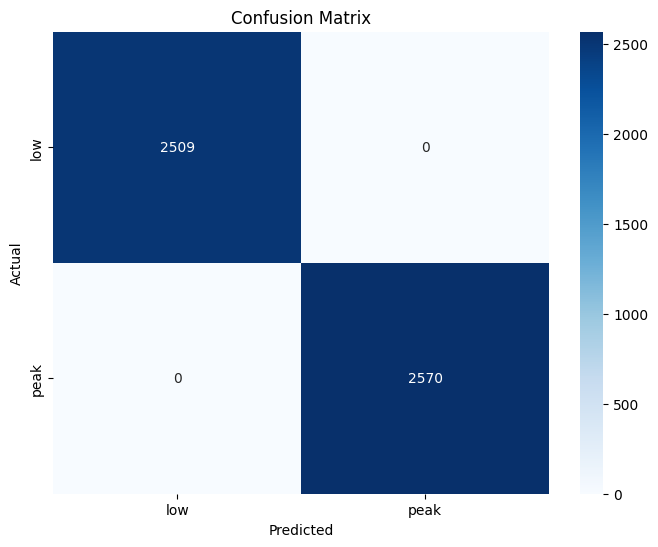

In [135]:
# Prediksi dan evaluasi dari model
y_pred = model.predict(X_test_scaled)  # Prediksi menggunakan X_test_scaled

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['low', 'peak'], yticklabels=['low', 'peak'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('confusion_matrix.png')  # Menyimpan gambar ke file
plt.show()

In [136]:
# Menampilkan Game teratas yang populer (label peak_sales == 1)
peak_game = df[df['peak_sales'] == 1].head(5)
print("5 Game Teratas Populer:")
print(peak_game[['index', 'Name_Encoded', 'Genre_Encoded', 'peak_sales']])

# Menampilkan Game teratas yang tidak populer (label peak_sales == 0)
low_game = df[df['peak_sales'] == 0].head(5)
print("\n5 Game Teratas Tidak Populer:")
print(low_game[['index','Name_Encoded', 'Genre_Encoded', 'peak_sales']])

5 Game Teratas Populer:
   index  Name_Encoded  Genre_Encoded  peak_sales
0      0         11076             10           1
1      1          9389              4           1
2      2          5613              6           1
3      3         11078             10           1
4      4          7392              7           1

5 Game Teratas Tidak Populer:
      index  Name_Encoded  Genre_Encoded  peak_sales
8202   8202          1925              7           0
8203   8203         10176              0           0
8204   8204          2909             10           0
8205   8205         10528              0           0
8206   8206          3059              1           0
